


# Project: Examining No-show appointments Dataset 



## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#questions">Asking Questions</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This dataset collects information from 100,000 plus medical appointments in Brazil and is
focused on the question of whether the patients show up for their appointment or not. Here, we
will be studying the features which will determine the response to appointments.
For analysing this data set, the very first process we will do is frame questions which we can
answer from the information given in the dataset.

<a id='questions'></a>
## Asking Questions:
1. Which age group visits the doctor more often?

2. Who shows up for the appoinment most of the times among males and females?

3. Do the patients show up for the hospitals loacted in specific areas?

4. What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

After framing our questions,we need to wrangle our data to make sure all the data we need is in
great quality. Three steps are involved in Data Wrangling.

### Step 1: Gathering of Data

In [2]:
df=pd.read_csv('C:/Users/somya/Desktop/Investigate/noshowappointments-kagglev2-may-2016.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Step 1: Assessing the Data

In [3]:
df.shape

(110527, 14)

In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [7]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

#### Observations after assessment of data-
1. There are no duplicate rows in the dataset.
2. There are no missing values in the data.
3. Some of the datatypes are incorrect.
4. Some of the column names are wrongly spelled.
5. Some of the row values are out of scope.




### 3rd Step: Data Cleaning 
> Now we will modify, replace, move data to ensure that dataset is well structured as possible. Here, the data is a bit clean so we don't need to perform substancial cleaning.

1.  Firstly, we will drop the columns which we will not use to predict the no-show appointments like PatientId and AppointmentID.


In [10]:
df.drop(['PatientId','AppointmentID'],axis=1,inplace=True)

2. As we saw in the above assessment that age of some patients was minimum -1 and maximum 115 which is out of the scope of age of normal human being, so we will remove the rows having age lesser than 0 and greater than 95 to get rid of outliers while visualizing our data.

In [11]:
df = df[(df['Age'] > 0) & (df['Age'] < 95)]
df.shape

(106917, 12)

3. Now, we will convert the incorrect datatype of scheduled day and appointment day which is given as String to dateTime.Also, we observed that their is no time specified for Appointment day so we don't need time for predicting.Hence, we will remove time from the row values and will take date in consideration.

In [12]:
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay']).dt.date


In [13]:
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay']).dt.date
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


4. Some of the columns are spelled wrongly.We will correct their spellings in order to avoid confusion afterwards.

In [14]:

df=df.rename(columns={'Handcap': 'Handicap', 'Hipertension': 'Hypertension','No-show':'NoShow'})

df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


5. Now, we will plot histogram for the independent variables to study the features so that we can carry observations further.

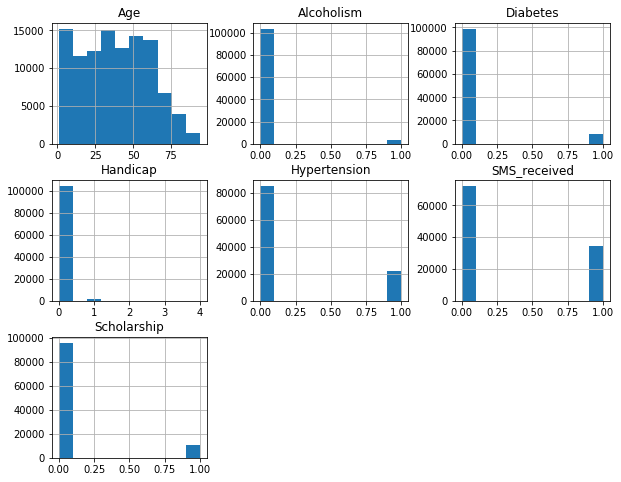

In [15]:
df.hist(figsize=(10,8));

#### Observations from the histogram-
1. Almost patients of all age categories get the appointment but there are more younger people with respect to older people.
2. There are few alcoholic,diabetic,handicapped and hypertension patients.
3. Some of the patients are also getting financial aid.


#### <a id='eda'></a>
## Exploratory Data Analysis

>Now comes the main part of the project where we will be exploring and augmenting data to maximize potential of analysis and visualizations and will use that to answer the questions which we framed in the starting.



### Research Question 1 : Which age group visits the doctor more often?

We will find the mean of the NoShow with respect to age to check the avg group age of patients who visits more often.

In [16]:
df.groupby('NoShow').mean().Age

NoShow
No     39.036305
Yes    35.290211
Name: Age, dtype: float64

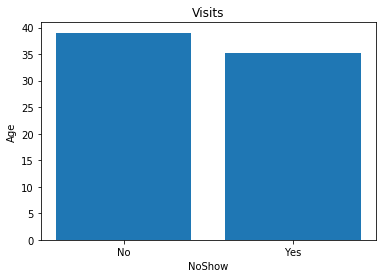

In [17]:
plt.bar(['No', 'Yes'], [39.036, 35.290]);
plt.title('Visits')
plt.xlabel('NoShow')
plt.ylabel('Age');

### Research Question 2 : Who shows up for the appointment most of the times among males and females?

We will plot the the NoShow variable to find how many people show up and how much dont by plotting bar chart.

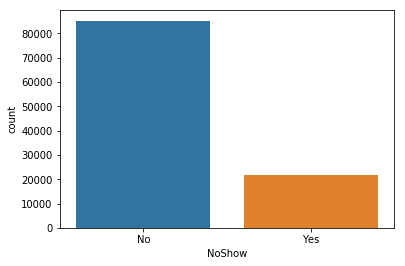

In [18]:
sns.countplot(x="NoShow", data=df)

We will also see the male/female proportion and will create a pie chart.

In [19]:
df['Gender'].value_counts(normalize=True)

F    0.655303
M    0.344697
Name: Gender, dtype: float64

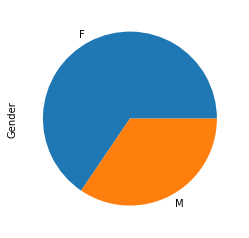

In [20]:
df['Gender'].value_counts(normalize=True).plot(kind='pie');

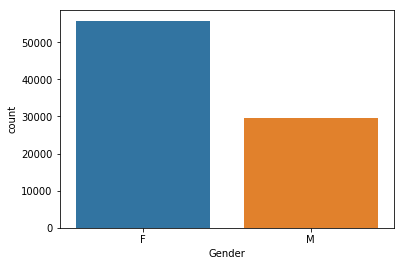

In [21]:
shows_up = df[df['NoShow'] == 'No']
sns.countplot(x='Gender', data=shows_up);

> ### Research Question 3: Do the patients show up for the hospitals loacted in specific areas?

We will find the count of people going for appointments for hospitals located in specific area.

In [22]:
shows = df[df['NoShow'] == 'No']
shows.groupby('Neighbourhood')['NoShow'].count().sort_values(ascending=False).head(30)

Neighbourhood
JARDIM CAMBURI         6149
MARIA ORTIZ            4367
RESISTÊNCIA            3360
JARDIM DA PENHA        3220
CENTRO                 2586
SANTA MARTHA           2547
ITARARÉ                2514
TABUAZEIRO             2465
SANTO ANTÔNIO          2195
BONFIM                 2161
JESUS DE NAZARETH      2043
SANTO ANDRÉ            1971
JABOUR                 1963
CARATOÍRA              1902
SÃO PEDRO              1848
NOVA PALESTINA         1763
DA PENHA               1732
ILHA DO PRÍNCIPE       1697
ANDORINHAS             1685
ROMÃO                  1660
ILHA DE SANTA MARIA    1482
BELA VISTA             1476
GURIGICA               1476
FORTE SÃO JOÃO         1475
SÃO JOSÉ               1460
MARUÍPE                1443
SÃO CRISTÓVÃO          1425
REDENÇÃO               1234
JOANA D´ARC            1116
CONSOLAÇÃO             1102
Name: NoShow, dtype: int64

> ### Research Question 4:  What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

We will find the mean of each feature and the visualize our data.

In [23]:
df.groupby('NoShow').mean().Handicap


NoShow
No     0.02339
Yes    0.02063
Name: Handicap, dtype: float64

In [24]:
df.groupby('NoShow').mean().Scholarship

NoShow
No     0.096633
Yes    0.118660
Name: Scholarship, dtype: float64

In [25]:
df.groupby('NoShow').mean().Hypertension

NoShow
No     0.211144
Yes    0.173674
Name: Hypertension, dtype: float64

In [26]:
df.groupby('NoShow').mean().Diabetes

NoShow
No     0.076317
Yes    0.065861
Name: Diabetes, dtype: float64

In [27]:
df.groupby('NoShow').mean().SMS_received

NoShow
No     0.293361
Yes    0.441455
Name: SMS_received, dtype: float64

In [28]:
df.groupby('NoShow').mean().Alcoholism

NoShow
No     0.031472
Yes    0.031246
Name: Alcoholism, dtype: float64

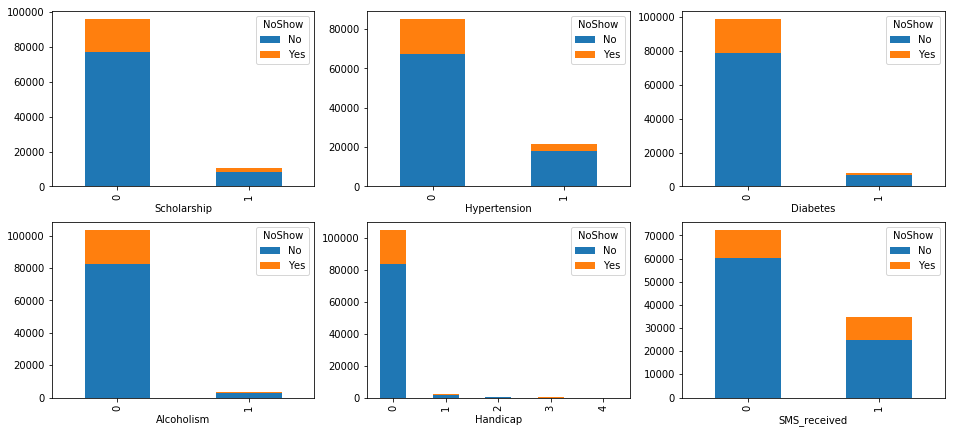

In [29]:
categories = [ 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received']

fig = plt.figure(figsize=(16, 11))
for i, v in enumerate(categories):
    ax = fig.add_subplot(3, 3, i+1)
    df.groupby([v, 'NoShow'])[v].count().unstack('NoShow').plot(ax=ax, kind='bar', stacked=True)

<a id='conclusions'></a>
## Conclusions
We analyzed that patients with age 35 and below often don't need to visit doctors whereas people with age 40 and above visit often.

Around 20000 patients that is 20% of patients don't show up for appointments.Patients with age 35 and below usually don't show up whereas people with age 40 and above show up.

There are more female patients that is around 65% of the total and male patients are arounf 35%.It is also found that most of the female patients show up for appointments with respect to men.

People also choose to show up according to the location of the hospitals in their respective locations.More people show up if the location is likely to be in their range.We have found the top thirty areas where the hospitals should be located so that people don't miss their appointments.

From the mean and bar plots of independent variables with respect to dependent variables, there is no specific feature which plays an important role other than other features in predicting our results but we have observed that if we keep on sending reminder sms to the patients, they are more likely to show up for their appointments as the mean is comparatively more and the plots also show the same.

